In [ ]:
import copy
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

You need to add these input files for input

In [ ]:
train_0 = pd.read_csv("/content/train_data_Captain.csv")
test_0 = pd.read_csv("/content/test_data_Captain (1).csv")
train_1 = copy.deepcopy(train_0)
test_1 = copy.deepcopy(test_0)

In [ ]:
rdf_o = pd.read_csv("/content/train_data_Total_FP.csv")
trdf_o = pd.read_csv("/content/test_data_Total_FP (1).csv")
rdf = copy.deepcopy(rdf_o)
trdf = copy.deepcopy(trdf_o)

Just getting a feel for the dataset

In [ ]:
train_1.shape

(21616, 27)

In [ ]:
rdf.shape

(21616, 27)

In [ ]:
train_1.head(10)

,match_id,season,match_name,home_team,away_team,venue,batting_innings,bowling_innings,Player_name,Starting_11,...,prev_conceded,prev_Overs_Bowled,prev_catches,prev_Dream Team,prev_Total_FP,prev_overs,prev_fielding_heroics,prev_duck,luck,Captain/Vice Captain
0,1,2008,CSK v DC,CSK,DC,"MA Chidambaram Stadium, Chepauk, Chennai",2.0,1.0,AB de Villiers,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,98,NC
1,2,2008,MI v DC,MI,DC,"Dr DY Patil Sports Academy, Mumbai",2.0,1.0,AB de Villiers,4.0,...,NaN,NaN,NaN,1.0,32.0,NaN,NaN,0,35,NC
2,3,2008,DC v CSK,DC,CSK,"Arun Jaitley Stadium, Delhi",1.0,2.0,AB de Villiers,4.0,...,NaN,NaN,1.0,0.0,37.0,NaN,0.0,0,79,NC
3,4,2008,RR v DC,RR,DC,"Sawai Mansingh Stadium, Jaipur",1.0,2.0,AB de Villiers,4.0,...,NaN,NaN,2.0,0.0,18.0,NaN,0.0,1,33,NC
4,5,2008,KKR v DC,KKR,DC,"Eden Gardens, Kolkata",2.0,1.0,AB de Villiers,4.0,...,NaN,NaN,0.0,1.0,36.0,NaN,1.0,0,82,NC
5,6,2008,RCB v DC,RCB,DC,"M.Chinnaswamy Stadium, Bengaluru",2.0,1.0,AB de Villiers,4.0,...,NaN,NaN,0.0,0.0,13.0,NaN,1.0,0,54,NC
6,7,2009,CSK v DC,CSK,DC,"Kingsmead, Durban",1.0,2.0,AB de Villiers,4.0,...,NaN,NaN,NaN,1.0,26.0,NaN,NaN,0,12,C
7,8,2009,RCB v DC,RCB,DC,"St George's Park, Port Elizabeth",2.0,1.0,AB de Villiers,4.0,...,NaN,NaN,2.0,1.0,164.0,NaN,0.0,0,65,NC
8,9,2009,DC v RR,DC,RR,"SuperSport Park, Centurion",1.0,2.0,AB de Villiers,4.0,...,NaN,NaN,0.0,1.0,37.0,NaN,1.0,0,71,NC
9,10,2009,SRH v DC,SRH,DC,"SuperSport Park, Centurion",2.0,1.0,AB de Villiers,4.0,...,NaN,NaN,NaN,1.0,69.0,NaN,NaN,0,70,NC


In [ ]:
rdf.head()

,match_id,season,match_name,home_team,away_team,venue,batting_innings,bowling_innings,Player_name,Starting_11,...,prev_conceded,prev_Overs_Bowled,prev_catches,prev_Dream Team,prev_Total_FP,prev_overs,prev_fielding_heroics,prev_duck,luck,Total_FP
0,1,2008,CSK v DC,CSK,DC,"MA Chidambaram Stadium, Chepauk, Chennai",2.0,1.0,AB de Villiers,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,98,32.0
1,2,2008,MI v DC,MI,DC,"Dr DY Patil Sports Academy, Mumbai",2.0,1.0,AB de Villiers,4.0,...,NaN,NaN,NaN,1.0,32.0,NaN,NaN,0,35,37.0
2,3,2008,DC v CSK,DC,CSK,"Arun Jaitley Stadium, Delhi",1.0,2.0,AB de Villiers,4.0,...,NaN,NaN,1.0,0.0,37.0,NaN,0.0,0,79,18.0
3,4,2008,RR v DC,RR,DC,"Sawai Mansingh Stadium, Jaipur",1.0,2.0,AB de Villiers,4.0,...,NaN,NaN,2.0,0.0,18.0,NaN,0.0,1,33,36.0
4,5,2008,KKR v DC,KKR,DC,"Eden Gardens, Kolkata",2.0,1.0,AB de Villiers,4.0,...,NaN,NaN,0.0,1.0,36.0,NaN,1.0,0,82,13.0


# Preprocessing for the Classifier
Involves train_1 and test_1

Finding all columns that have null values in train_0

In [ ]:
train_1.isnull().sum()

match_id                     0
season                       0
match_name                   0
home_team                    0
away_team                    0
venue                        0
batting_innings              0
bowling_innings              0
Player_name                  0
Starting_11                  0
bowling_team_bowl         9900
batting_team_bat          6462
prev_runs                 6917
prev_balls                6917
prev_sixes                6917
prev_fours                6917
prev_wickets             10281
prev_conceded            10281
prev_Overs_Bowled        10281
prev_catches             14934
prev_Dream Team            677
prev_Total_FP              677
prev_overs               10281
prev_fielding_heroics    14934
prev_duck                    0
luck                         0
Captain/Vice Captain         0
dtype: int64

In [ ]:
train_1['prev_Total_FP'] = train_1['prev_Total_FP'].apply(lambda x: x + 4)
test_1['prev_Total_FP'] = test_1['prev_Total_FP'].apply(lambda x: x + 4)

Filling null values with a default

In [ ]:
train_1['bowling_team_bowl'] = train_1['bowling_team_bowl'].fillna(0)
train_1['batting_team_bat'] = train_1['batting_team_bat'].fillna(0)
train_1.fillna({'prev_runs':0,'prev_balls':0,'prev_sixes':0,'prev_fours':0,'prev_wickets':0,'prev_conceded':0,'prev_Overs_Bowled':0, 'prev_catches':0, 'prev_Dream Team':0, 'prev_Total_FP':0, 'prev_overs':0, 'prev_fielding_heroics':0},inplace=True)

Encoding the categorical values

In [ ]:
train_1['home_team'] = train_1['home_team'].replace(['CSK','MI','DC','RR','KKR','RCB','SRH','PBKS','Kochi','PWI','RPS','GL',
 'LSG','GT'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
train_1['away_team'] = train_1['away_team'].replace(['CSK','MI','DC','RR','KKR','RCB','SRH','PBKS','Kochi','PWI','RPS','GL',
 'LSG','GT'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
train_1['batting_team_bat'] = train_1['batting_team_bat'].replace(['CSK','MI','DC','RR','KKR','RCB','SRH','PBKS','Kochi','PWI','RPS','GL',
 'LSG','GT'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
train_1['bowling_team_bowl'] = train_1['bowling_team_bowl'].replace(['CSK','MI','DC','RR','KKR','RCB','SRH','PBKS','Kochi','PWI','RPS','GL',
 'LSG','GT'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14])

In [ ]:
label_encoder_VENUE = LabelEncoder()
label_encoder_VENUE.fit(train_1['venue'])
train_1['venue'] = label_encoder_VENUE.transform(train_1['venue'])

In [ ]:
label_encoder_PlayerName = LabelEncoder()
label_encoder_PlayerName.fit(train_1['Player_name'])
train_1['Player_name'] = label_encoder_PlayerName.transform(train_1['Player_name'])
train_1['prev_Overs_Bowled'] = train_1['prev_Overs_Bowled'].astype(str)
label_encoder_prevOversBowled = LabelEncoder()
label_encoder_prevOversBowled.fit(train_1['prev_Overs_Bowled'])
train_1['prev_Overs_Bowled'] = label_encoder_prevOversBowled.transform(train_1['prev_Overs_Bowled'])

In [ ]:
train_1 = train_1.drop('match_name',axis=1)

Doing the preprocessing for test_1

In [ ]:
test_1['bowling_team_bowl'] = test_1['bowling_team_bowl'].fillna(0)
test_1['batting_team_bat'] = test_1['batting_team_bat'].fillna(0)
test_1.fillna({'prev_runs':0,'prev_balls':0,'prev_sixes':0,'prev_fours':0,'prev_wickets':0,'prev_conceded':0,'prev_Overs_Bowled':0, 'prev_catches':0, 'prev_Dream Team':0, 'prev_Total_FP':0, 'prev_overs':0, 'prev_fielding_heroics':0},inplace=True)
test_1['home_team'] = test_1['home_team'].replace(['CSK','MI','DC','RR','KKR','RCB','SRH','PBKS','Kochi','PWI','RPS','GL',
 'LSG','GT'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
test_1['away_team'] = test_1['away_team'].replace(['CSK','MI','DC','RR','KKR','RCB','SRH','PBKS','Kochi','PWI','RPS','GL',
 'LSG','GT'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
test_1['batting_team_bat'] = test_1['batting_team_bat'].replace(['CSK','MI','DC','RR','KKR','RCB','SRH','PBKS','Kochi','PWI','RPS','GL',
 'LSG','GT'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
test_1['bowling_team_bowl'] = test_1['bowling_team_bowl'].replace(['CSK','MI','DC','RR','KKR','RCB','SRH','PBKS','Kochi','PWI','RPS','GL',
 'LSG','GT'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
test_1['prev_Overs_Bowled'] = test_1['prev_Overs_Bowled'].astype(str)
test_1['prev_Overs_Bowled'] = test_1['prev_Overs_Bowled'].replace(['[3, 6, 16, 20]', '[2, 14, 17, 20]', '[2, 11, 16, 20]', '[1, 7, 13, 17]', '[5, 10, 15, 18]', '[1, 10, 16, 18]', '[2, 5, 9, 19]', '[6, 12, 18]', '[4, 6, 10, 16]', '[2, 10, 12]', '[9, 12, 17, 20]', '[1, 8, 13, 19]', '[7, 13, 19]', '[6, 11, 15, 17]', '[4, 8, 13, 15]', '[3, 6, 14, 17]', '[3, 13, 15, 19]', '[4, 7, 17, 20]', '[4, 9, 12, 19]', '[4, 12, 15, 20]', '[5, 13, 15, 17]', '[6, 9, 12, 18]', '[2, 7, 10, 12]', '[2, 13, 17]'],'[8, 14, 18, 20]')
test_1['prev_Overs_Bowled'] = label_encoder_prevOversBowled.transform(test_1['prev_Overs_Bowled'])

# Preprocessing for the Regressor
Involves rdf and trdf

Looking for features with null values in rdf

In [ ]:
rdf.isnull().sum()

match_id                     0
season                       0
match_name                   0
home_team                    0
away_team                    0
venue                        0
batting_innings              0
bowling_innings              0
Player_name                  0
Starting_11                  0
bowling_team_bowl         9900
batting_team_bat          6462
prev_runs                 6917
prev_balls                6917
prev_sixes                6917
prev_fours                6917
prev_wickets             10281
prev_conceded            10281
prev_Overs_Bowled        10281
prev_catches             14934
prev_Dream Team            677
prev_Total_FP              677
prev_overs               10281
prev_fielding_heroics    14934
prev_duck                    0
luck                         0
Total_FP                     0
dtype: int64

Shifting the minimum value of prev_Total_FP to 0, then the null values are set as 0

In [ ]:
rdf['prev_Total_FP'] = rdf['prev_Total_FP'].apply(lambda x: x + 4)
trdf['prev_Total_FP'] = trdf['prev_Total_FP'].apply(lambda x: x + 4)

Filling the null values

In [ ]:
rdf['bowling_team_bowl'] = rdf['bowling_team_bowl'].fillna(0)
rdf['batting_team_bat'] = rdf['batting_team_bat'].fillna(0)
rdf.fillna({'prev_runs':0,'prev_balls':0,'prev_sixes':0,'prev_fours':0,'prev_wickets':0,'prev_conceded':0,'prev_Overs_Bowled':0, 'prev_catches':0, 'prev_Dream Team':0, 'prev_Total_FP':0, 'prev_overs':0, 'prev_fielding_heroics':0},inplace=True)

In [ ]:
print(rdf['home_team'].unique())
print(rdf['away_team'].unique())
print(rdf['prev_Overs_Bowled'].unique())

['CSK' 'MI' 'DC' 'RR' 'KKR' 'RCB' 'SRH' 'PBKS' 'Kochi' 'PWI' 'RPS' 'GL'
 'LSG' 'GT']
['DC' 'CSK' 'RR' 'KKR' 'MI' 'PBKS' 'RCB' 'PWI' 'Kochi' 'SRH' 'RPS' 'GL'
 'LSG' 'GT']
[0 '[11, 17]' '[14, 16]' ... '[1, 6, 13, 19]' '[3, 12, 14, 17]'
 '[1, 10, 15, 17]']


Encoding the catergorical columns

In [ ]:
rdf['home_team'].replace(['CSK','MI','DC','RR','KKR','RCB','SRH','PBKS','Kochi','PWI','RPS','GL',
 'LSG','GT'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14], inplace=True)
rdf['away_team'].replace(['CSK','MI','DC','RR','KKR','RCB','SRH','PBKS','Kochi','PWI','RPS','GL',
 'LSG','GT'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14], inplace=True)
rdf['batting_team_bat'].replace(['CSK','MI','DC','RR','KKR','RCB','SRH','PBKS','Kochi','PWI','RPS','GL',
 'LSG','GT'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14], inplace=True)
rdf['bowling_team_bowl'].replace(['CSK','MI','DC','RR','KKR','RCB','SRH','PBKS','Kochi','PWI','RPS','GL',
 'LSG','GT'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14], inplace=True)

In [ ]:
label_encoder_VENUE = LabelEncoder()
label_encoder_VENUE.fit(rdf['venue'])
rdf['venue'] = label_encoder_VENUE.transform(rdf['venue'])

In [ ]:
label_encoder_PlayerName = LabelEncoder()
label_encoder_PlayerName.fit(rdf['Player_name'])
rdf['Player_name'] = label_encoder_PlayerName.transform(rdf['Player_name'])
rdf['prev_Overs_Bowled'] = rdf['prev_Overs_Bowled'].astype(str)
label_encoder_prevOversBowled = LabelEncoder()
label_encoder_prevOversBowled.fit(rdf['prev_Overs_Bowled'])
rdf['prev_Overs_Bowled'] = label_encoder_prevOversBowled.transform(rdf['prev_Overs_Bowled'])

In [ ]:
categorical_cols = [col for col in rdf.columns if rdf[col].dtype == "object"]
print(categorical_cols)

['match_name']


In [ ]:
rdf = rdf.drop('match_name',axis=1)

repeating the same above stuff with trdf, but only difference being that, the values not in training, but that are part of test (for player_name and prev_Overs_Bowled), are given an arbitrary value that is in training (not the most efficient though method, there is a room for improvement here)

In [ ]:
print(set(trdf_o["Player_name"])-set(rdf_o["Player_name"]))


{'Doug Bracewell', 'Kedar Devdhar', 'Mohammad Ashraful'}


In [ ]:
print(set(trdf_o['prev_Overs_Bowled'])-set(rdf_o["prev_Overs_Bowled"]))

{'[4, 9, 12, 19]', '[7, 13, 19]', '[1, 10, 16, 18]', '[4, 12, 15, 20]', '[3, 6, 14, 17]', '[2, 13, 17]', '[4, 8, 13, 15]', '[6, 12, 18]', '[2, 5, 9, 19]', '[1, 7, 13, 17]', '[6, 9, 12, 18]', '[3, 6, 16, 20]', '[2, 10, 12]', '[4, 6, 10, 16]', '[2, 14, 17, 20]', '[5, 10, 15, 18]', '[6, 11, 15, 17]', '[1, 8, 13, 19]', '[2, 7, 10, 12]', '[5, 13, 15, 17]', '[2, 11, 16, 20]', '[3, 13, 15, 19]', '[9, 12, 17, 20]', '[4, 7, 17, 20]'}


In [ ]:
trdf['bowling_team_bowl'] = trdf['bowling_team_bowl'].fillna(0)
trdf['batting_team_bat'] = trdf['batting_team_bat'].fillna(0)
trdf.fillna({'prev_runs':0,'prev_balls':0,'prev_sixes':0,'prev_fours':0,'prev_wickets':0,'prev_conceded':0,'prev_Overs_Bowled':0, 'prev_catches':0, 'prev_Dream Team':0, 'prev_Total_FP':0, 'prev_overs':0, 'prev_fielding_heroics':0},inplace=True)
trdf['home_team'].replace(['CSK','MI','DC','RR','KKR','RCB','SRH','PBKS','Kochi','PWI','RPS','GL',
 'LSG','GT'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14], inplace=True)
trdf['away_team'].replace(['CSK','MI','DC','RR','KKR','RCB','SRH','PBKS','Kochi','PWI','RPS','GL',
 'LSG','GT'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14], inplace=True)
trdf['batting_team_bat'].replace(['CSK','MI','DC','RR','KKR','RCB','SRH','PBKS','Kochi','PWI','RPS','GL',
 'LSG','GT'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14], inplace=True)
trdf['bowling_team_bowl'].replace(['CSK','MI','DC','RR','KKR','RCB','SRH','PBKS','Kochi','PWI','RPS','GL',
 'LSG','GT'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14], inplace=True)
trdf['venue'] = label_encoder_VENUE.transform(trdf['venue'])
trdf['Player_name'] = trdf['Player_name'].replace(['Mohammad Ashraful', 'Doug Bracewell', 'Kedar Devdhar'],'Glenn Maxwell')
trdf['Player_name'] = label_encoder_PlayerName.transform(trdf['Player_name'])
trdf['prev_Overs_Bowled'] = trdf['prev_Overs_Bowled'].astype(str)
trdf['prev_Overs_Bowled'] = trdf['prev_Overs_Bowled'].replace(['[3, 6, 16, 20]', '[2, 14, 17, 20]', '[2, 11, 16, 20]', '[1, 7, 13, 17]', '[5, 10, 15, 18]', '[1, 10, 16, 18]', '[2, 5, 9, 19]', '[6, 12, 18]', '[4, 6, 10, 16]', '[2, 10, 12]', '[9, 12, 17, 20]', '[1, 8, 13, 19]', '[7, 13, 19]', '[6, 11, 15, 17]', '[4, 8, 13, 15]', '[3, 6, 14, 17]', '[3, 13, 15, 19]', '[4, 7, 17, 20]', '[4, 9, 12, 19]', '[4, 12, 15, 20]', '[5, 13, 15, 17]', '[6, 9, 12, 18]', '[2, 7, 10, 12]', '[2, 13, 17]'],'[8, 14, 18, 20]')
trdf['prev_Overs_Bowled'] = label_encoder_prevOversBowled.transform(trdf['prev_Overs_Bowled'])

# EDA For the Regressor

In [ ]:
rdf.columns

Index(['match_id', 'season', 'home_team', 'away_team', 'venue',
       'batting_innings', 'bowling_innings', 'Player_name', 'Starting_11',
       'bowling_team_bowl', 'batting_team_bat', 'prev_runs', 'prev_balls',
       'prev_sixes', 'prev_fours', 'prev_wickets', 'prev_conceded',
       'prev_Overs_Bowled', 'prev_catches', 'prev_Dream Team', 'prev_Total_FP',
       'prev_overs', 'prev_fielding_heroics', 'prev_duck', 'luck', 'Total_FP'],
      dtype='object')

Plotting a Total_FP vs Match_ID, the hue represents prev_Total_FP, this is a multivariate analysis

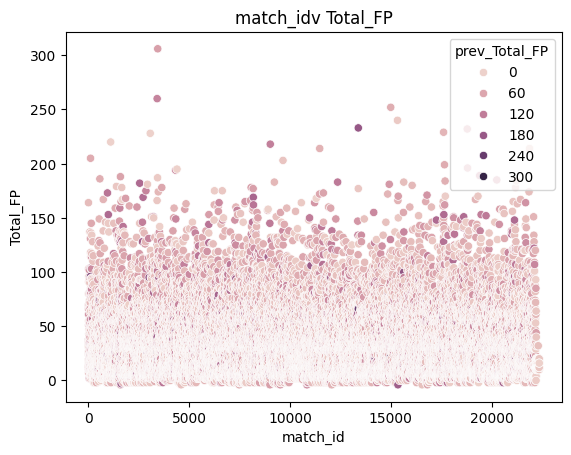

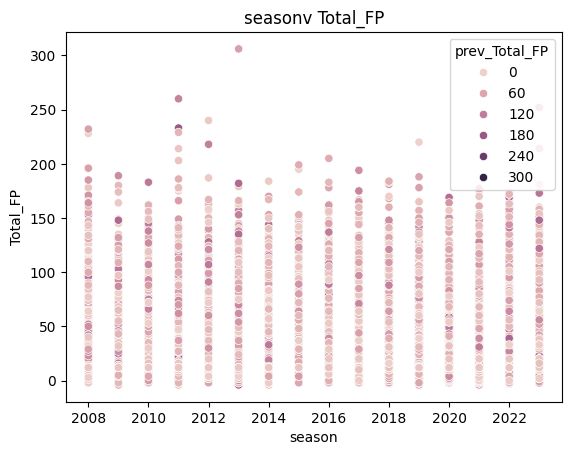

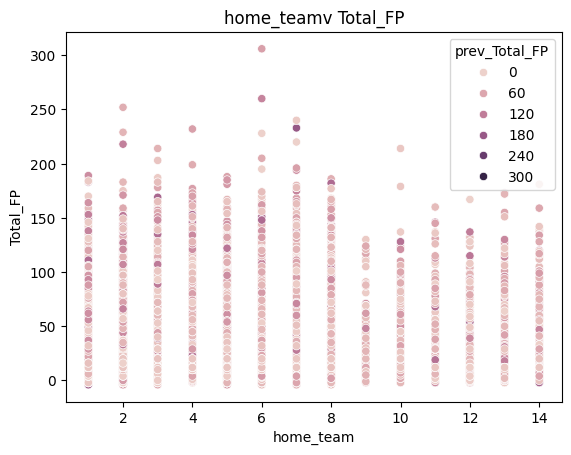

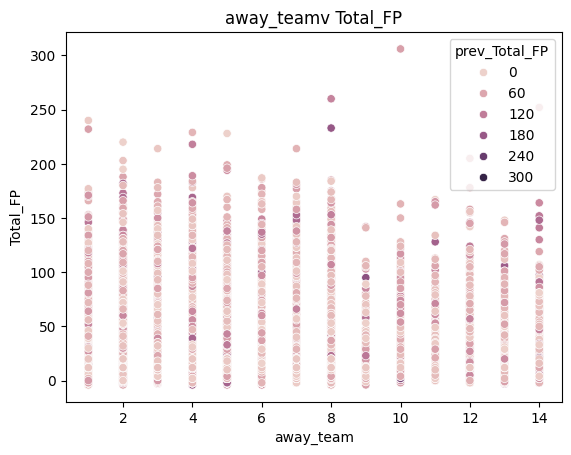

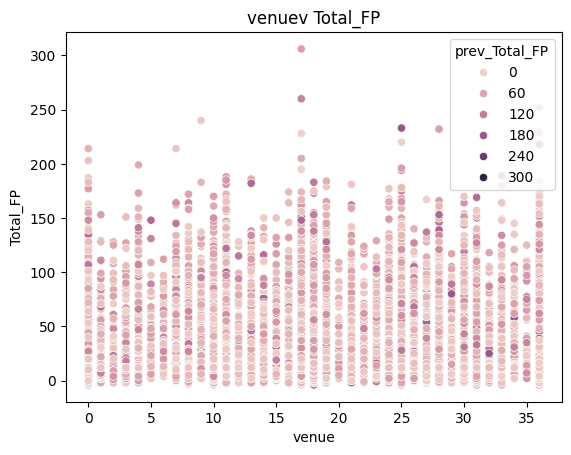

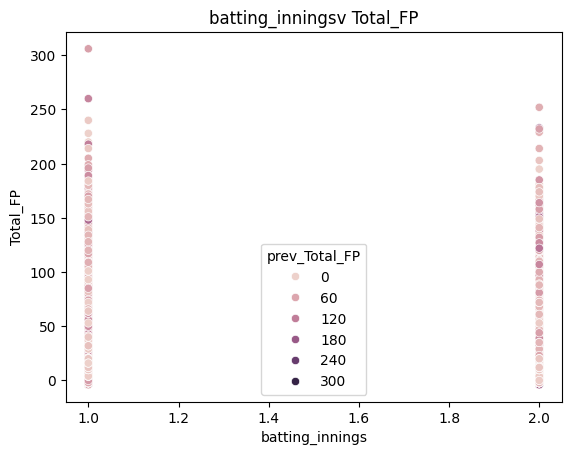

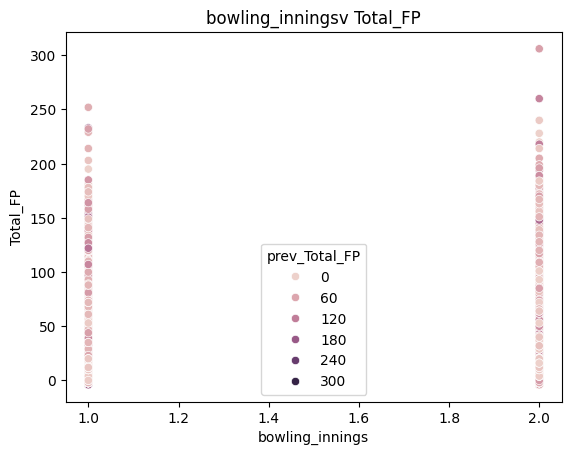

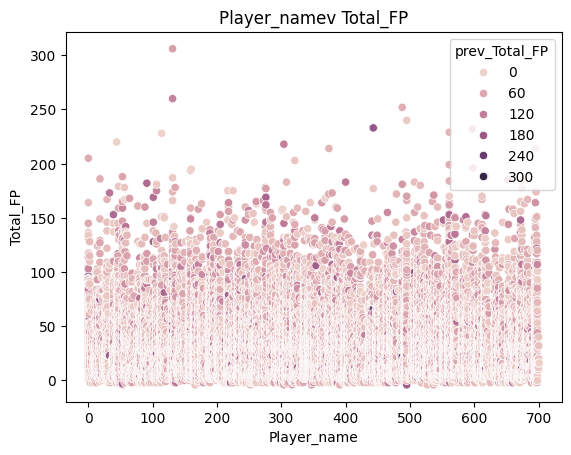

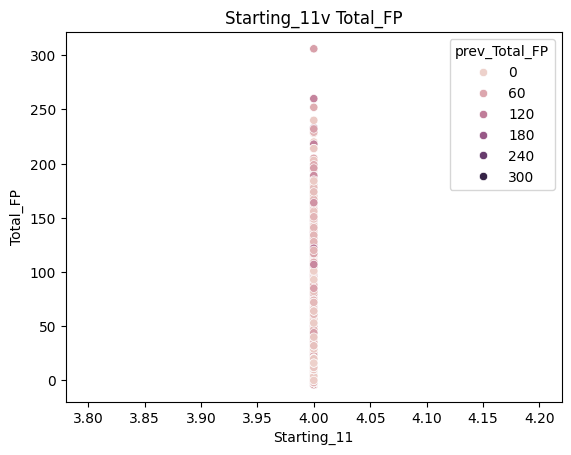

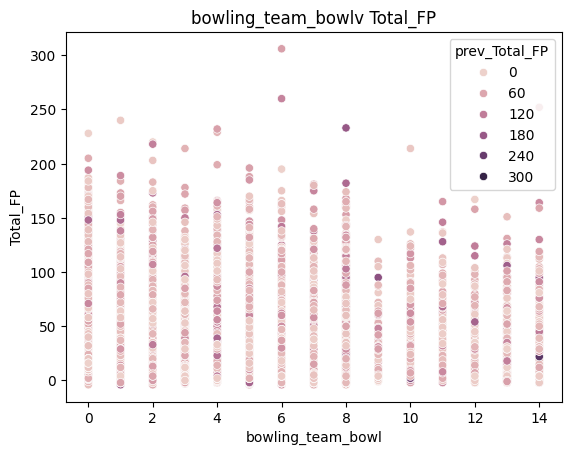

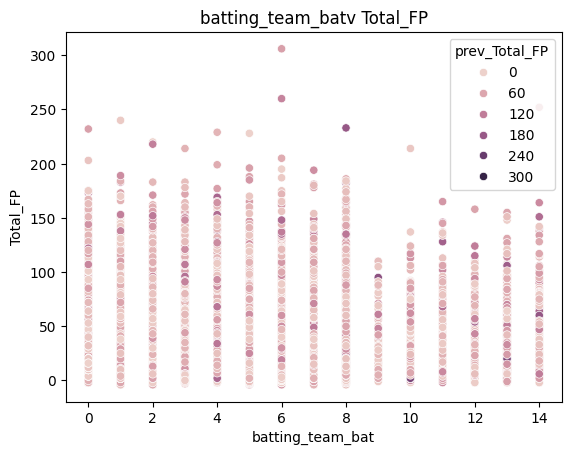

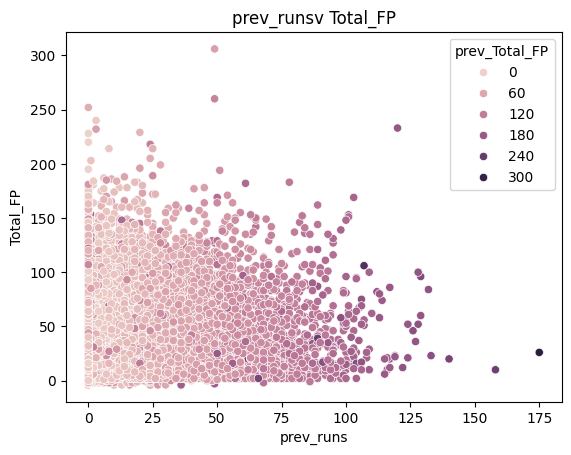

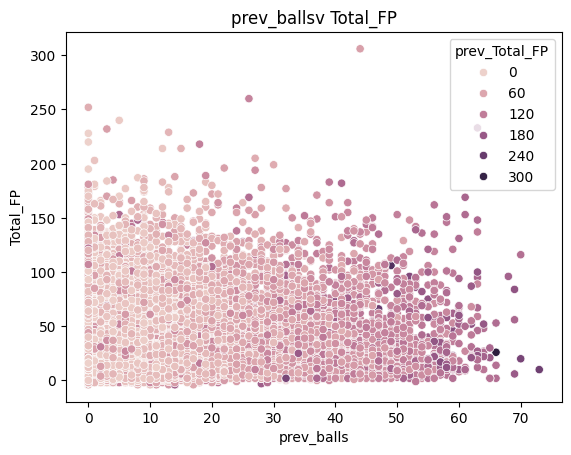

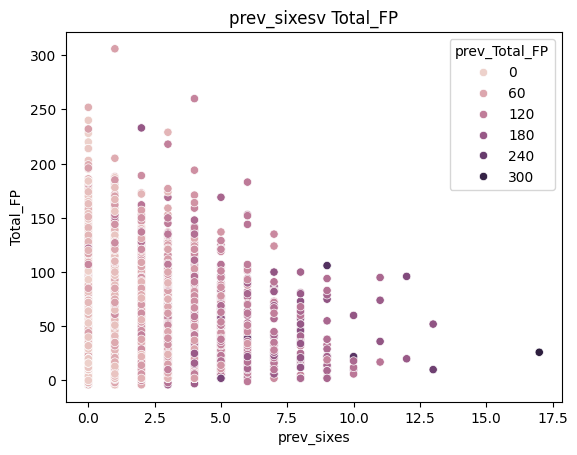

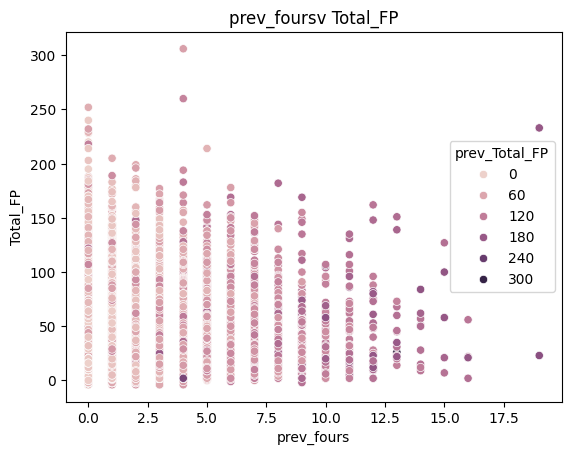

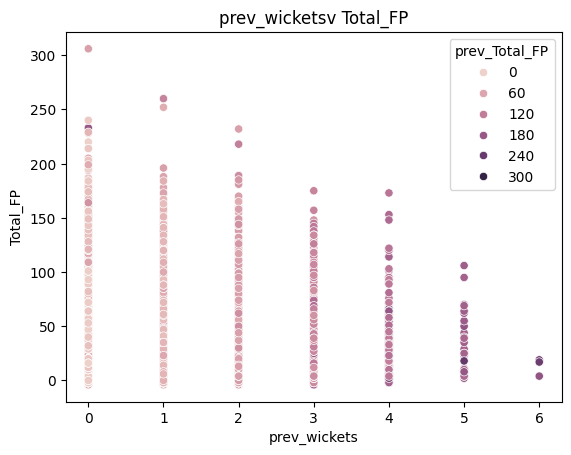

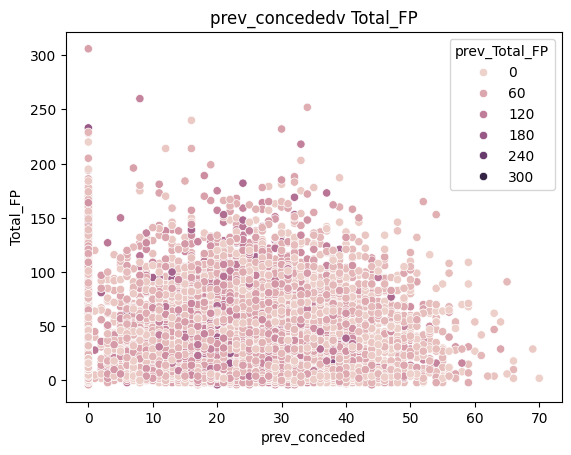

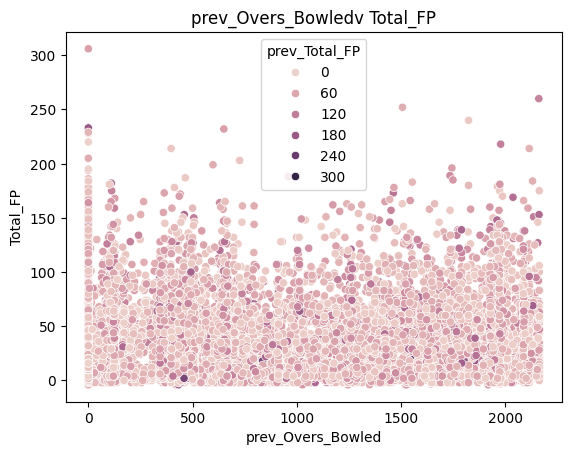

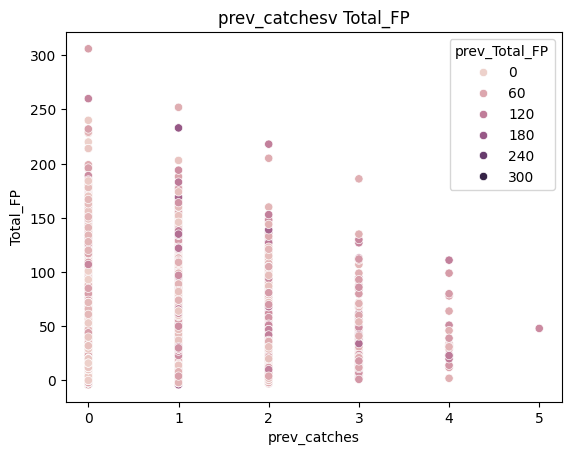

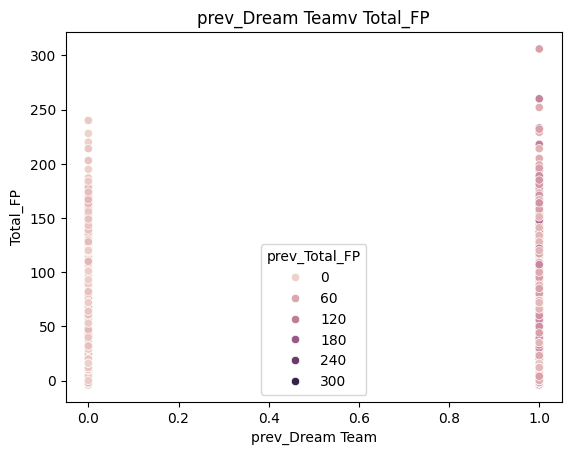

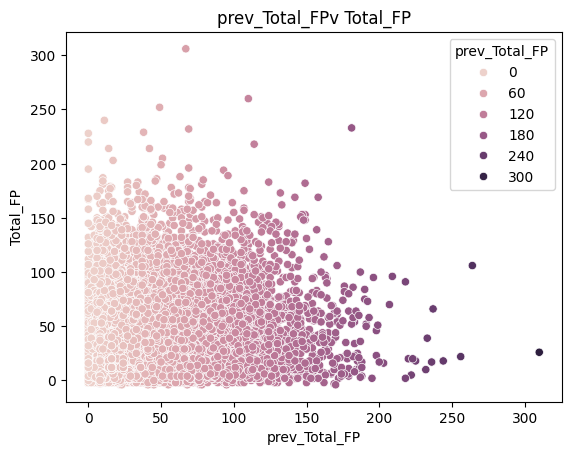

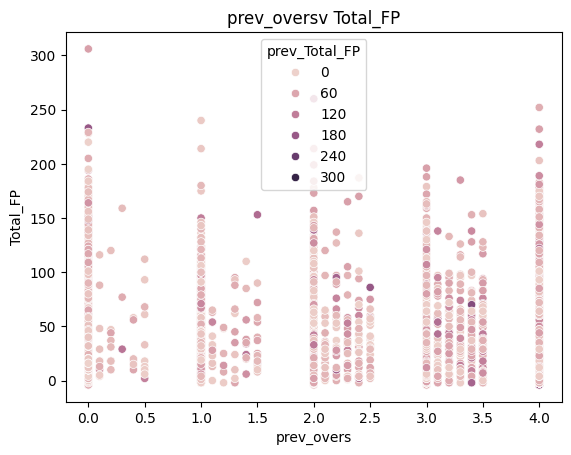

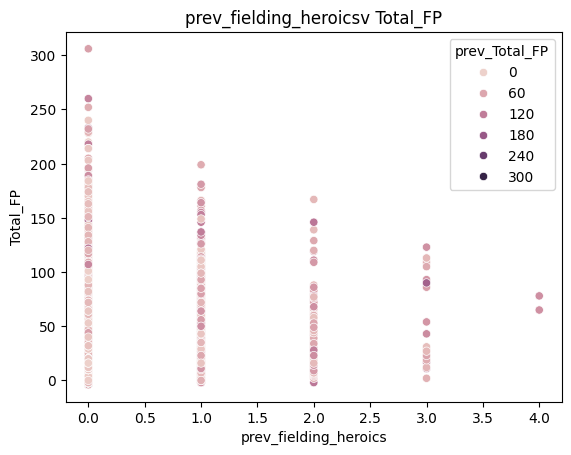

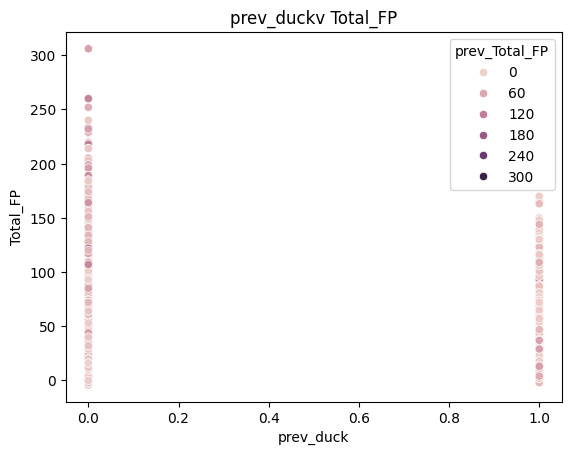

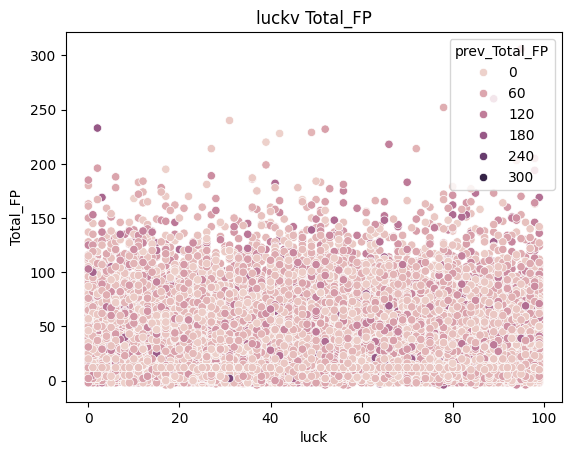

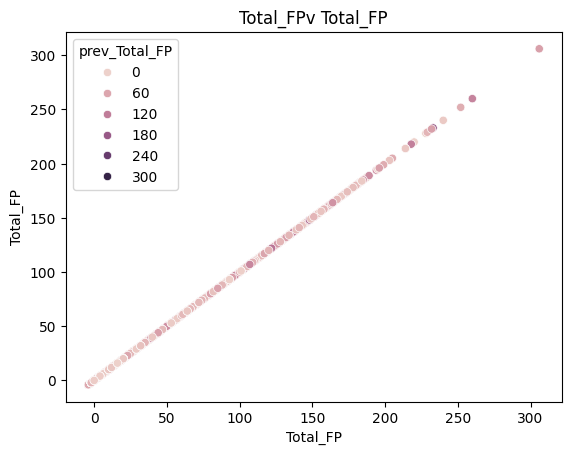

In [ ]:
for r in rdf.columns:
  ax = sns.scatterplot(data=rdf,x=r,y='Total_FP',hue='prev_Total_FP')
  ax.set_title(str(r)+'v Total_FP')
  plt.show()

Bar Plot of the correlation with Total_FP vs features

<Axes: >

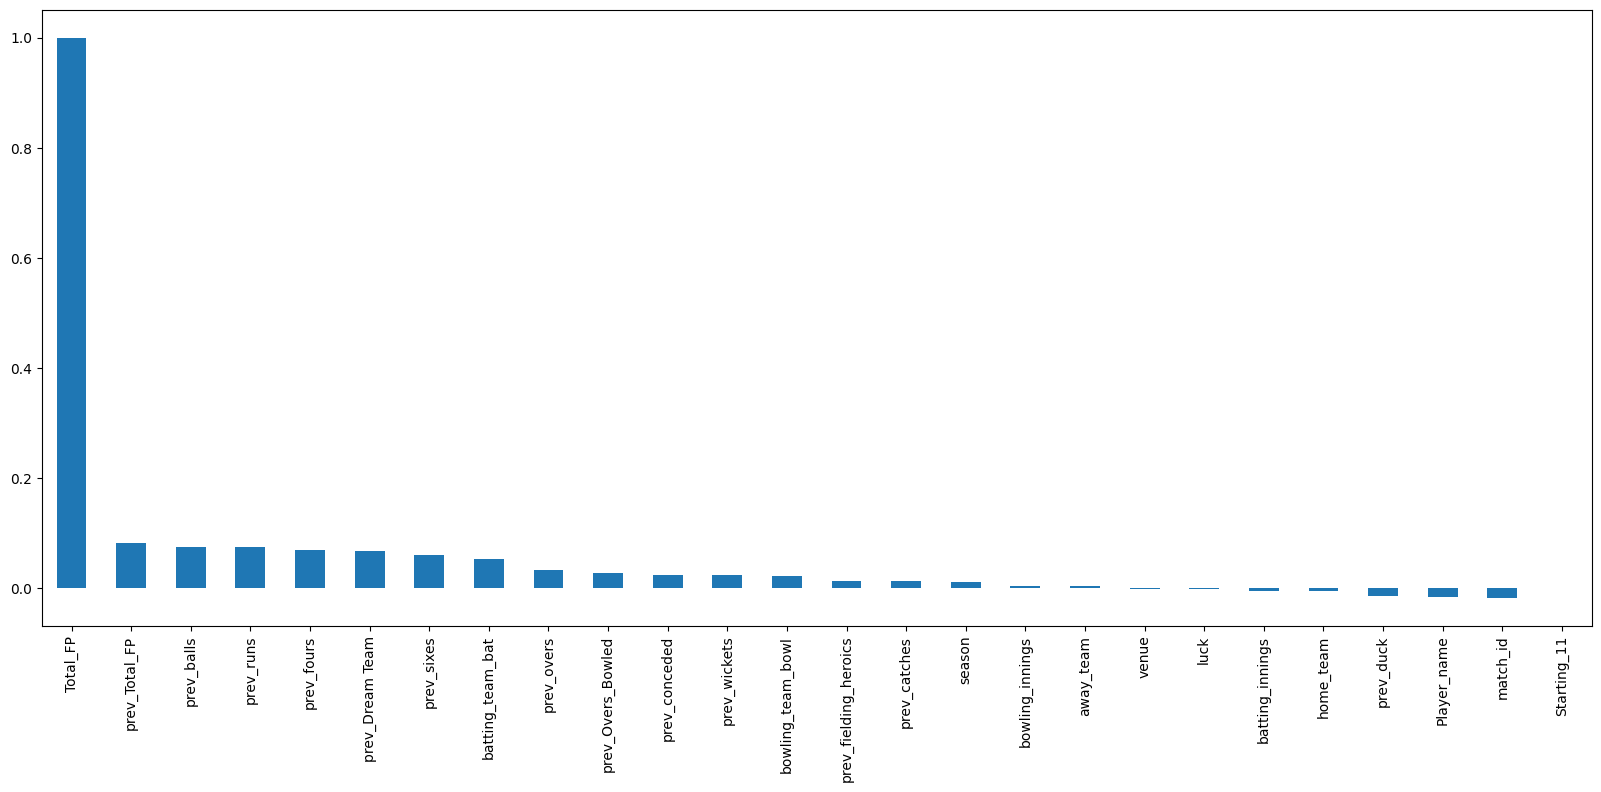

In [ ]:
plt.figure(figsize=(20,8))
rdf.corr()['Total_FP'].sort_values(ascending=False).plot(kind='bar')

In [ ]:
corr_matrix = rdf.corr()
corr_matrix

,match_id,season,home_team,away_team,venue,batting_innings,bowling_innings,Player_name,Starting_11,bowling_team_bowl,...,prev_conceded,prev_Overs_Bowled,prev_catches,prev_Dream Team,prev_Total_FP,prev_overs,prev_fielding_heroics,prev_duck,luck,Total_FP
match_id,1.000000,0.014878,-0.011593,-0.007544,-0.010175,0.007114,-0.007114,0.999460,NaN,-0.006288,...,-0.018398,0.010094,-0.017507,-0.013661,-0.018463,-0.014877,0.000004,0.000692,0.003070,-0.016957
season,0.014878,1.000000,0.120953,0.102347,0.001775,0.000364,-0.000364,0.013133,NaN,0.031473,...,0.033256,0.005085,0.029106,-0.005834,0.028370,0.001890,-0.055176,0.008273,-0.017379,0.010640
home_team,-0.011593,0.120953,1.000000,-0.036160,-0.041070,0.000072,-0.000072,-0.011889,NaN,0.231602,...,0.004206,0.002568,-0.002231,-0.006890,-0.006858,-0.003991,-0.006963,-0.003351,0.004313,-0.005350
away_team,-0.007544,0.102347,-0.036160,1.000000,-0.004235,-0.000242,0.000242,-0.007654,NaN,0.230272,...,0.002669,0.001189,0.003423,-0.010588,-0.003428,-0.004477,-0.005160,0.016152,0.004722,0.004190
venue,-0.010175,0.001775,-0.041070,-0.004235,1.000000,-0.001497,0.001497,-0.010203,NaN,-0.012128,...,0.005675,-0.000601,0.010943,-0.006621,0.003407,0.004069,-0.010530,0.004829,-0.006740,-0.001392
batting_innings,0.007114,0.000364,0.000072,-0.000242,-0.001497,1.000000,-1.000000,0.007097,NaN,0.010708,...,0.002871,0.007281,-0.002262,-0.000239,-0.002545,0.005886,-0.003419,0.010645,-0.000268,-0.004292
bowling_innings,-0.007114,-0.000364,-0.000072,0.000242,0.001497,-1.000000,1.000000,-0.007097,NaN,-0.010708,...,-0.002871,-0.007281,0.002262,0.000239,0.002545,-0.005886,0.003419,-0.010645,0.000268,0.004292
Player_name,0.999460,0.013133,-0.011889,-0.007654,-0.010203,0.007097,-0.007097,1.000000,NaN,-0.004589,...,-0.015957,0.011512,-0.017546,-0.013006,-0.018084,-0.012111,0.001000,0.000930,0.003304,-0.016350
Starting_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bowling_team_bowl,-0.006288,0.031473,0.231602,0.230272,-0.012128,0.010708,-0.010708,-0.004589,NaN,1.000000,...,0.570740,0.454325,-0.128178,0.037599,0.004806,0.602473,-0.079564,0.022689,0.011960,0.023107


The correlation Heat Map

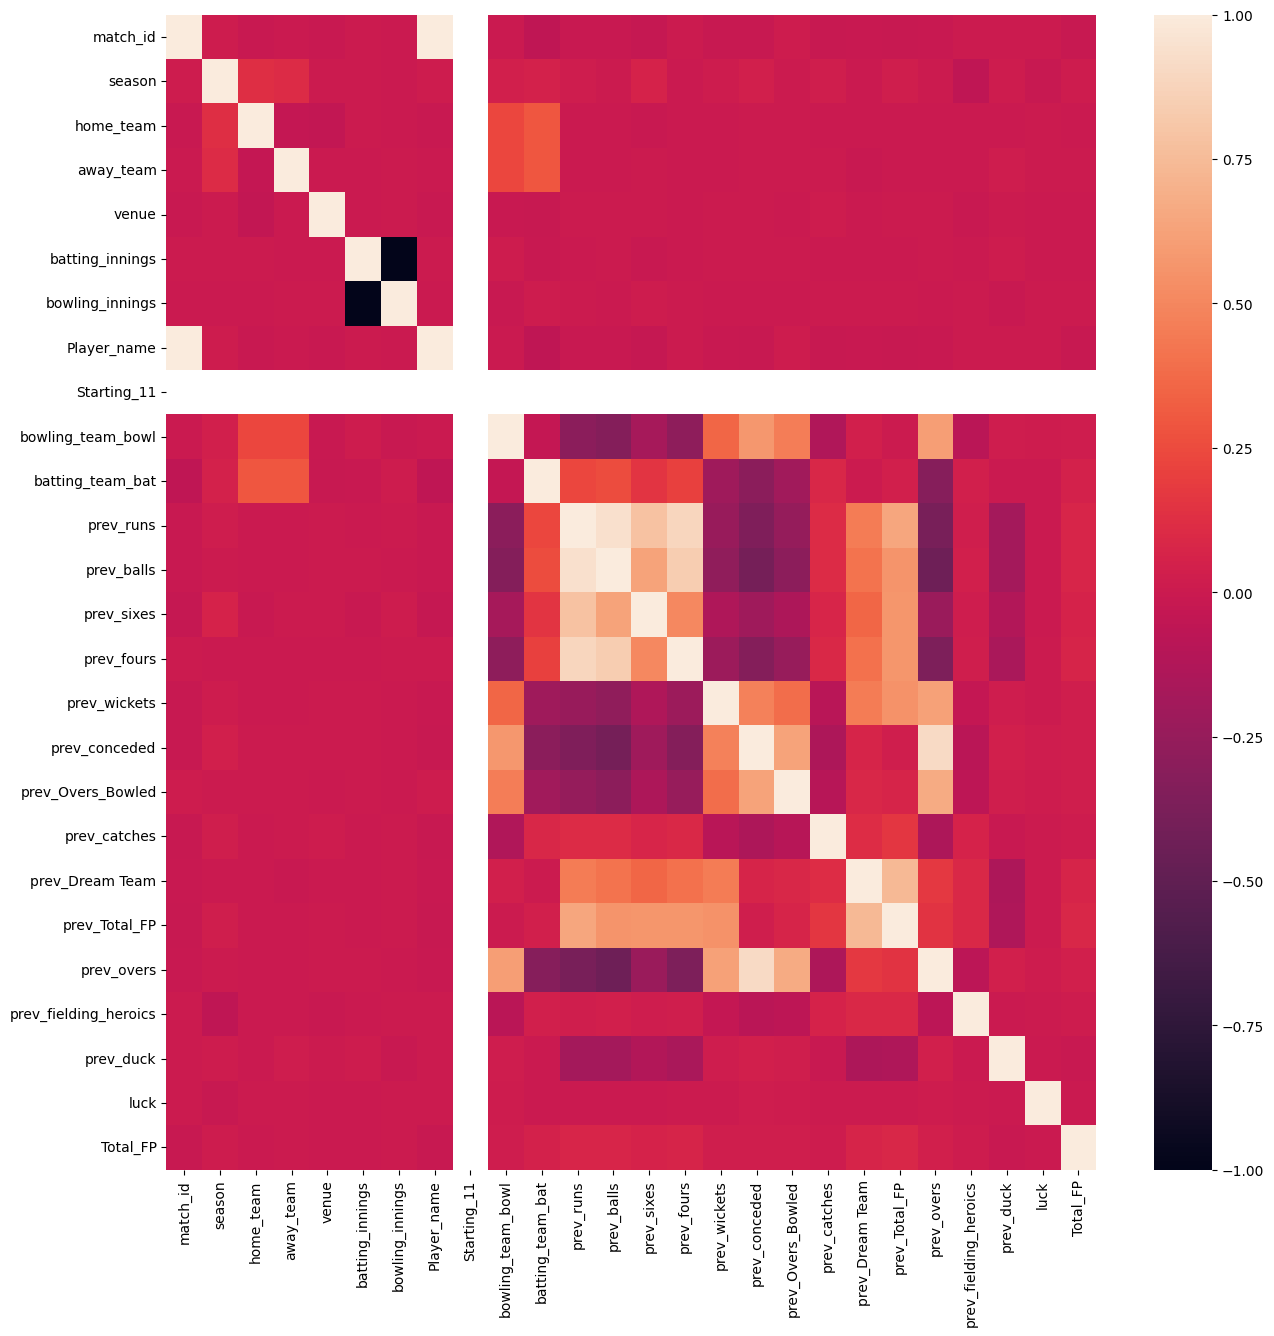

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix)
plt.show()

# Heat Map for classifier

In [ ]:
print(train_1['Captain/Vice Captain'].value_counts())

Captain/Vice Captain
NC    19981
VC      827
C       808
Name: count, dtype: int64


In [ ]:
print(train_1['Captain/Vice Captain'].unique())

['NC' 'C' 'VC']


Encoding captain and vice captain values

In [ ]:
mapping = {"C": 1, "VC": 2, "NC": 3}
# Map the values in the 'captain/vice captain' column for train_1 dataframe
train_1['Captain/Vice Captain'] = train_1['Captain/Vice Captain'].map(mapping)
train_1.head()

,match_id,season,home_team,away_team,venue,batting_innings,bowling_innings,Player_name,Starting_11,bowling_team_bowl,...,prev_conceded,prev_Overs_Bowled,prev_catches,prev_Dream Team,prev_Total_FP,prev_overs,prev_fielding_heroics,prev_duck,luck,Captain/Vice Captain
0,1,2008,1,3,18,2.0,1.0,0,4.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,98,3
1,2,2008,2,3,7,2.0,1.0,0,4.0,0,...,0.0,0,0.0,1.0,36.0,0.0,0.0,0,35,3
2,3,2008,3,1,0,1.0,2.0,0,4.0,0,...,0.0,0,1.0,0.0,41.0,0.0,0.0,0,79,3
3,4,2008,4,3,28,1.0,2.0,0,4.0,0,...,0.0,0,2.0,0.0,22.0,0.0,0.0,1,33,3
4,5,2008,5,3,11,2.0,1.0,0,4.0,0,...,0.0,0,0.0,1.0,40.0,0.0,1.0,0,82,3


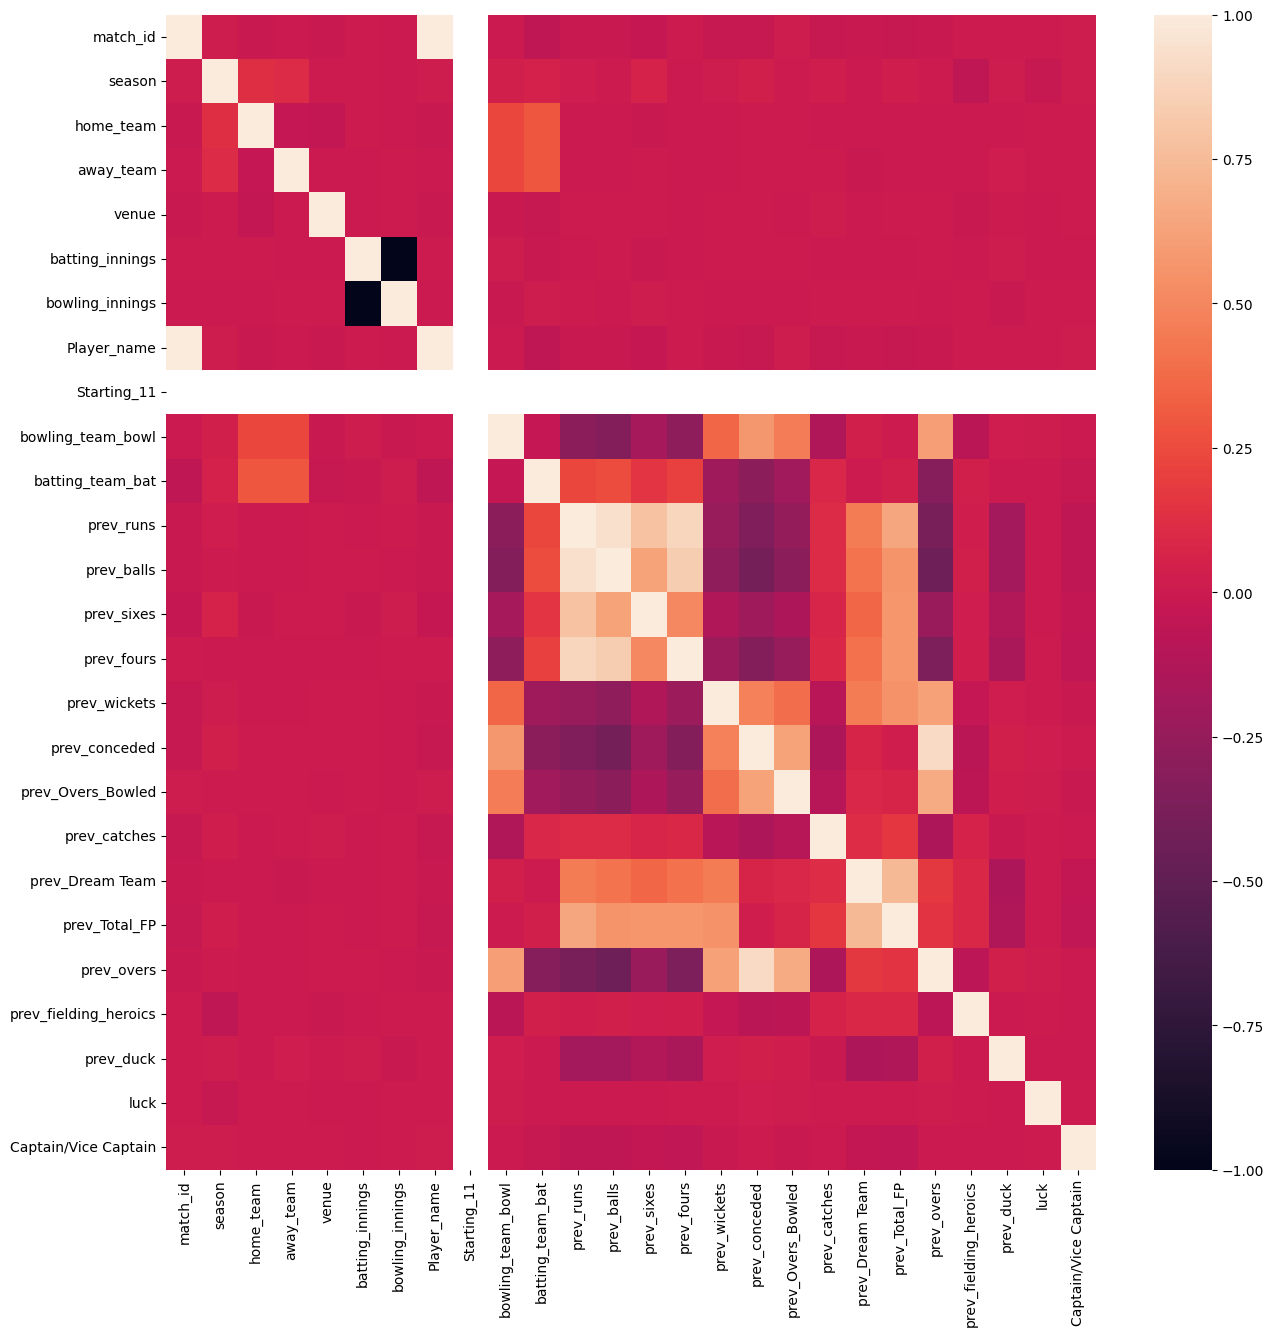

In [ ]:
corr_matrix = train_1.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix)
plt.show()

Nice Barplot that relates the correlation value with captain/vice_captain and the feature


<Axes: >

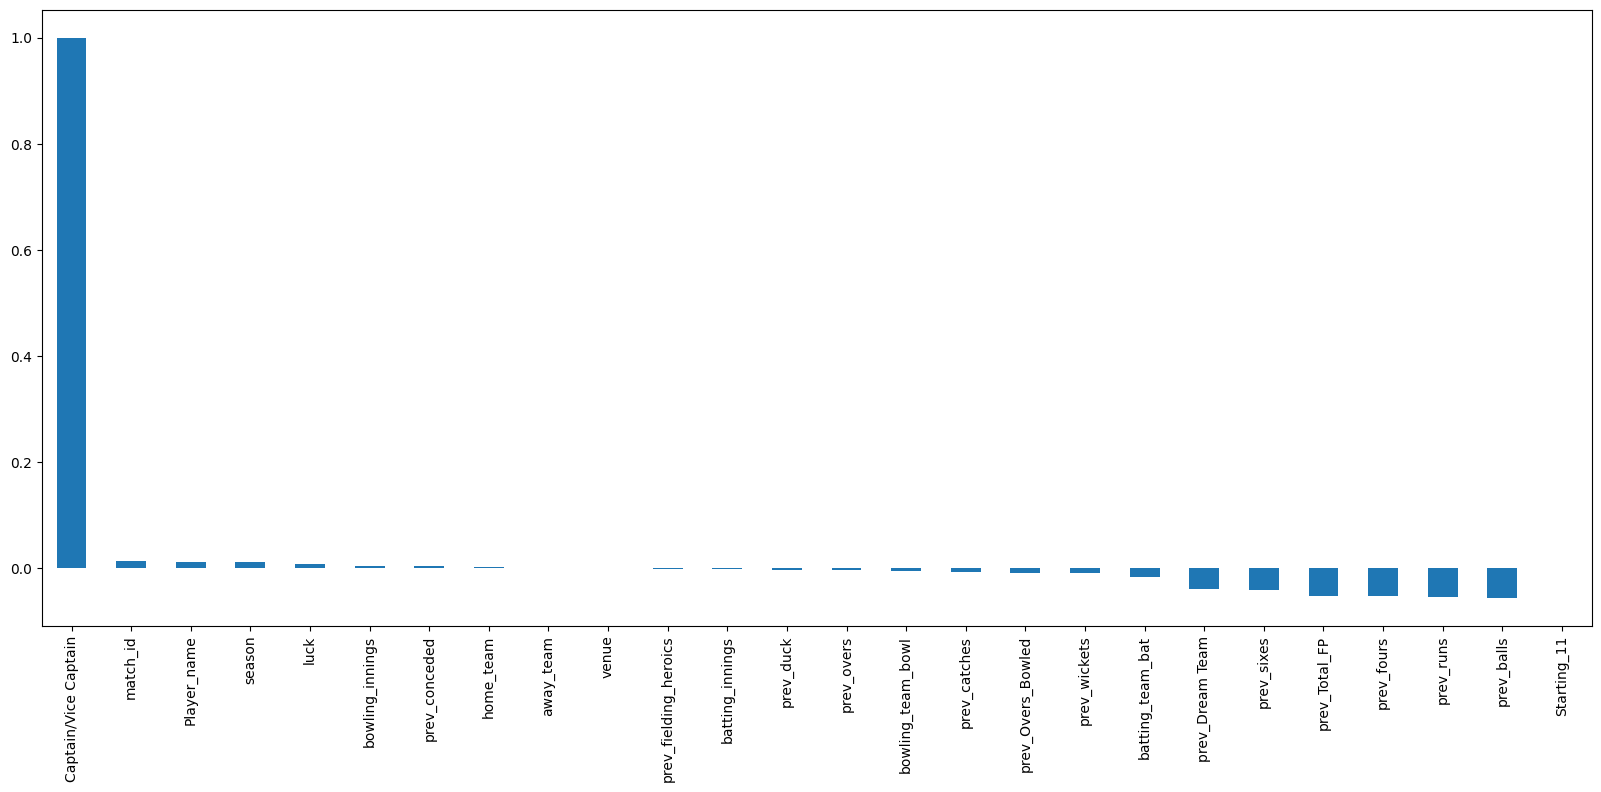

In [ ]:
plt.figure(figsize=(20,8))
train_1.corr()['Captain/Vice Captain'].sort_values(ascending=False).plot(kind='bar')

# Classifier Models

1.   **Neural Network**



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [ ]:
features = train_1.columns.difference(['Captain/Vice Captain'])
target = 'Captain/Vice Captain'
X = train_1[features]
y = train_1[target]

Splitting the data

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=32)

Creating the Structure of Neural Network

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
y_train = to_categorical(y_train - 1)
y_val = to_categorical(y_val - 1)

In [ ]:
#checkpoint = tf.keras.callbacks.ModelCheckpoint('ckpt_MobileNet.keras', monitor='val_accuracy', verbose=2, save_best_only=True, mode='max')
#stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)

#try:
 #   model.load_weights('ckpt_MobileNet.keras')
#except:
 #   print('No existing Checkpoints, created new one.')

Training the Model

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
541/541 [==============================] - 3s 4ms/step - loss: 14.9669 - accuracy: 0.8957 - val_loss: 0.4317 - val_accuracy: 0.9232
Epoch 2/50
541/541 [==============================] - 2s 3ms/step - loss: 0.4760 - accuracy: 0.9246 - val_loss: 0.4838 - val_accuracy: 0.9232
Epoch 3/50
541/541 [==============================] - 2s 3ms/step - loss: 0.3954 - accuracy: 0.9246 - val_loss: 0.3261 - val_accuracy: 0.9232
Epoch 4/50
541/541 [==============================] - 2s 3ms/step - loss: 0.3351 - accuracy: 0.9246 - val_loss: 0.3247 - val_accuracy: 0.9232
Epoch 5/50
541/541 [==============================] - 2s 3ms/step - loss: 0.3249 - accuracy: 0.9246 - val_loss: 0.3262 - val_accuracy: 0.9232
Epoch 6/50
541/541 [==============================] - 2s 4ms/step - loss: 0.3266 - accuracy: 0.9246 - val_loss: 0.3232 - val_accuracy: 0.9232
Epoch 7/50
541/541 [==============================] - 3s 5ms/step - loss: 0.3300 - accuracy: 0.9246 - val_loss: 0.3514 - val_accuracy: 0.9232
Epoch

From this we can realize that even neural network has a maximum accuracy of less than 0.94

In [ ]:
X_test = train_1[features]
prediction = model.predict(X_test)
print(prediction)


676/676 [==============================] - 2s 3ms/step
[[0.03723081 0.03796253 0.92480665]
 [0.03723081 0.03796253 0.92480665]
 [0.03723081 0.03796253 0.92480665]
 ...
 [0.03723081 0.03796253 0.92480665]
 [0.03723081 0.03796253 0.92480665]
 [0.03723081 0.03796253 0.92480665]]


The result is quite poor, all of the values are NC.

In [ ]:
unmapping = {0: "C", 1: "VC", 2: "NC"}
# predictions_series = pd.Series(unmapping)
# mapped_predictions_series = predictions_series.map(unmapping)
# predicts = mapped_predictions_series.to_numpy()
row_max_indices = prediction.argmax(axis=1)
predicts = []
for x in row_max_indices:
  predicts.append(unmapping[x])
print(predicts)

['NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC

2.   **RandomForestClassifier with OneVsRestClassifier (useful for multiclass classification)** - We are using optuna to optimize the hyperparameteres of RandomForestClassifer, then this will fed to the OneVsRestClassifier.

Installing Optuna - It is a library used to find the most optimal hyperparameters

In [ ]:
!pip install optuna

In [ ]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.multiclass import OneVsRestClassifier

Given data has a lot of samples for NC, so what this random oversampler does is, it will duplicate samples that have lower occurence, and fixes the training dataset, this has some problems with simply duplicating the lower occurence data, we might further improve on this by combining randomundersampling, that  deletes majority class data at random.

In [ ]:
features = train_1.columns.difference(['Captain/Vice Captain'])
target = 'Captain/Vice Captain'
X = train_1[features]
y = train_1[target]
ros = RandomOverSampler(random_state=10)
X, y = ros.fit_resample(X,y)

Splitting the dataset

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

Creating the objective Function for Optuna study.

> Here we are specifying the range of values for different parameters and sample them in these ranges, we are using random sampler, with a constant seed to reproduce the results. A random result will not take into account previous trail results.



In [ ]:
def objective(trial):
    X_train_, X_val_, y_train_, y_val_ = train_test_split(X,y,test_size=0.2)
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 32)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 32)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=32)
    model.fit(X_train_, y_train_)

    y_pred = model.predict(X_val_)

    # metric  to optimize
    score = accuracy_score(y_val_, y_pred)

    return score

study = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=42)) #Random Sampler used with a constant seed value
study.optimize(objective, n_trials=10)

# Print the best parameters found
print("Best trial:")
trial = study.best_trial

print("Value: {:.4f}".format(trial.value))

print("Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


[I 2024-06-04 16:01:22,169] A new study created in memory with name: no-name-b6b6ceea-2794-4563-b34c-b3cd2634d507
[I 2024-06-04 16:02:13,937] Trial 0 finished with value: 0.9777295854533322 and parameters: {'n_estimators': 437, 'max_depth': 48, 'min_samples_split': 24, 'min_samples_leaf': 20, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9777295854533322.
[I 2024-06-04 16:02:25,433] Trial 1 finished with value: 0.9693051964300609 and parameters: {'n_estimators': 152, 'max_depth': 45, 'min_samples_split': 20, 'min_samples_leaf': 23, 'max_features': 'log2'}. Best is trial 0 with value: 0.9777295854533322.
[I 2024-06-04 16:03:44,424] Trial 2 finished with value: 0.9983318041538076 and parameters: {'n_estimators': 850, 'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 2 with value: 0.9983318041538076.
[I 2024-06-04 16:04:23,371] Trial 3 finished with value: 0.9987488531153558 and parameters: {'n_estimators': 489, 'max_depth': 21

Best trial:
Value: 0.9987
Params: 
    n_estimators: 489
    max_depth: 21
    min_samples_split: 20
    min_samples_leaf: 5
    max_features: log2


After using optuna, we have some cases where the accuracy is 0.995+, this clearly means the model is overfitting the cross-validation set, to prevent this we must choose parameters that produce more accurate results than the default for randomforestclassifier (~0.92) as reported, but not be too huge to cause overfitting. An accuracy ~0.98 is a nice choice, it also gave the best result.

In [ ]:
rf_model = RandomForestClassifier(n_estimators=437, max_depth=48, min_samples_split=24, min_samples_leaf=20,max_features='sqrt',  random_state=32)
clf = OneVsRestClassifier(rf_model)
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=48,
                                                     min_samples_leaf=20,
                                                     min_samples_split=24,
                                                     n_estimators=437,
                                                     random_state=32))

In [ ]:
# Make predictions on the validation set
y_val_pred = clf.predict(X_val)

In [ ]:
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))


Validation Accuracy: 0.9856535157227458
Validation Classification Report:
               precision    recall  f1-score   support

           1       0.98      1.00      0.99      4039
           2       0.98      1.00      0.99      4000
           3       1.00      0.96      0.98      3950

    accuracy                           0.99     11989
   macro avg       0.99      0.99      0.99     11989
weighted avg       0.99      0.99      0.99     11989



In [ ]:
#Now for the test set
test_1.head()

,match_id,season,match_name,home_team,away_team,venue,batting_innings,bowling_innings,Player_name,Starting_11,...,prev_wickets,prev_conceded,prev_Overs_Bowled,prev_catches,prev_Dream Team,prev_Total_FP,prev_overs,prev_fielding_heroics,prev_duck,luck
0,8486,2009,RCB v RR,6,4,"Newlands, Cape Town",2.0,1.0,Kamran Khan,4.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,96
1,21272,2022,RCB v GT,6,14,"Wankhede Stadium, Mumbai",2.0,1.0,Wanindu Hasaranga de Silva,4.0,...,2.0,15.0,1930,1.0,1.0,73.0,4.0,0.0,0,40
2,16353,2023,LSG v DC,13,3,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,2.0,1.0,Rovman Powell,4.0,...,0.0,0.0,0,0.0,1.0,64.0,0.0,0.0,0,51
3,13436,2017,RCB v DC,6,3,"M.Chinnaswamy Stadium, Bengaluru",1.0,2.0,Pawan Negi,4.0,...,1.0,19.0,1959,0.0,1.0,37.0,3.0,0.0,0,41
4,1323,2023,RCB v CSK,6,1,"M.Chinnaswamy Stadium, Bengaluru",1.0,2.0,Ambati Rayudu,4.0,...,0.0,0.0,0,0.0,0.0,9.0,0.0,0.0,0,88


In [ ]:
test_1 = test_1.drop('match_name',axis=1)


Encoding in the test dataset

In [ ]:
label_encoder_PlayerName = LabelEncoder()
label_encoder_PlayerName.fit(test_1['Player_name'])
test_1['Player_name'] = label_encoder_PlayerName.transform(test_1['Player_name'])

In [ ]:
label_encoder_VENUE = LabelEncoder()
label_encoder_VENUE.fit(test_1['venue'])
test_1['venue'] = label_encoder_VENUE.transform(test_1['venue'])

In [ ]:
train_columns = [col for col in train_1[features] if col != 'Captain/Vice Captain']
test_1 = test_1[train_columns]

In [ ]:
train_1[features].head()

,Player_name,Starting_11,away_team,batting_innings,batting_team_bat,bowling_innings,bowling_team_bowl,home_team,luck,match_id,...,prev_conceded,prev_duck,prev_fielding_heroics,prev_fours,prev_overs,prev_runs,prev_sixes,prev_wickets,season,venue
0,0,4.0,3,2.0,3,1.0,0,1,98,1,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,2008,18
1,0,4.0,3,2.0,3,1.0,0,2,35,2,...,0.0,0,0.0,2.0,0.0,26.0,0.0,0.0,2008,7
2,0,4.0,1,1.0,3,2.0,0,3,79,3,...,0.0,0,0.0,2.0,0.0,21.0,1.0,0.0,2008,0
3,0,4.0,3,1.0,3,2.0,0,4,33,4,...,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,2008,28
4,0,4.0,3,2.0,3,1.0,0,5,82,5,...,0.0,0,1.0,0.0,0.0,20.0,0.0,0.0,2008,11


In [ ]:
test_1.head()

,Player_name,Starting_11,away_team,batting_innings,batting_team_bat,bowling_innings,bowling_team_bowl,home_team,luck,match_id,...,prev_conceded,prev_duck,prev_fielding_heroics,prev_fours,prev_overs,prev_runs,prev_sixes,prev_wickets,season,venue
0,112,4.0,4,2.0,4,1.0,4,6,96,8486,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,2009,23
1,272,4.0,14,2.0,0,1.0,6,6,40,21272,...,15.0,0,0.0,0.0,4.0,1.0,0.0,2.0,2022,36
2,216,4.0,3,2.0,3,1.0,0,13,51,16353,...,0.0,0,0.0,1.0,0.0,43.0,4.0,0.0,2023,3
3,182,4.0,3,1.0,6,2.0,6,6,41,13436,...,19.0,0,0.0,0.0,3.0,6.0,0.0,1.0,2017,17
4,15,4.0,1,1.0,1,2.0,0,6,88,1323,...,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,2023,17


In [ ]:
prediction = clf.predict(test_1)
print(prediction)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 1 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3
 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 2 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3
 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3
 3 3 2 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 1 3 1 3 3 3 3 3 3 3 

The is the final prediction for classes

In [ ]:
unmapping = {1: "C", 2: "VC", 3: "NC"}
predictions_series = pd.Series(prediction)
mapped_predictions_series = predictions_series.map(unmapping)
predicts = mapped_predictions_series.to_numpy()
print(predicts)

['NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'C'
 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC'
 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC'
 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'VC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'C'
 'NC' 'NC' 'NC' 'C' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC'
 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC'
 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC'
 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'VC' 'NC' 'NC' 'NC' 'NC'
 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC'
 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC'
 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC'
 'NC' 'VC' 'NC' 'NC' 'NC' 'NC' 'NC' 'C' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC'
 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC'
 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 'NC' 

# Regression Models

In [ ]:
X = rdf.drop(['Total_FP'],axis=1)
y = rdf['Total_FP']


**1.   Linear Regression** - A basic Model Just for Initial Testing







We are scaling the data, it is particularly helpful for Linear Regression

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle = True)

In [ ]:
import math
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()

model_lr.fit(X_train, y_train)
y_trainpred = model_lr.predict(X_val)
y_pred = model_lr.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(1/math.sqrt(mse))

0.031994982717451124


**2.  Feature Selection with XGBoost Regressor** - We are taking the scaled version of the data and applying feature selection, then the model used is XGBoost


**Feature Selection**: It creates a list of f_scores, based on the dependancy of that feature on the Total_FP

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split

fs = SelectKBest(score_func = mutual_info_regression, k = 'all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_val_fs = fs.transform(X_val)
for i in range(len(fs.scores_)):
  print(i, fs.scores_[i])

0 0.09550099426120617
1 0.00015799846185249322
2 0.0
3 0.005027088508346544
4 0.00297278660149658
5 0.0
6 0.0022898745607466964
7 0.09171380983572153
8 0.0
9 0.0907972951728766
10 0.17085547432960269
11 0.03328012815670167
12 0.04501177087811303
13 0.018651605442523866
14 0.04174220335608547
15 0.040583086752211006
16 0.07301268859348564
17 0.06897195193123018
18 0.007136188791961651
19 0.004545408017792685
20 0.03313821206953271
21 0.07406112864052483
22 0.00829309216584262
23 0.0
24 0.0


Finding the best columns that gives highest 1/sqrt(mse) value, this was done using a loop

In [ ]:
import xgboost as xgb
import math
k_best = 1
best = -1
model3_best = None
for k in range(1,24):
  selector = SelectKBest(mutual_info_regression, k = k)
  X_new =  selector.fit_transform(X, y)
  X_train, X_val, y_train, y_val = train_test_split(X_new, y, shuffle = True)
  model3 = xgb.XGBRegressor(
      max_depth = 4,
      learning_rate = 0.01,
      n_estimators = 100,
      verbosity = 1
  )
  model3.fit(X_train, y_train)
  y_pred = model3.predict(X_val)
  mse = mean_squared_error(y_val, y_pred)
  if 1/math.sqrt(mse) > best:
    model3_best = model3
    best = 1/math.sqrt(mse)
    k_best = k
  print(best)

0.031455354969313655
0.0326386831335782
0.0326386831335782
0.0326386831335782
0.0326386831335782
0.0326386831335782
0.0326386831335782
0.0326386831335782
0.0326386831335782
0.0326386831335782
0.0326386831335782
0.03269190308048479
0.03269190308048479
0.03269190308048479
0.03269190308048479
0.03269190308048479
0.03269190308048479
0.03269190308048479
0.03269190308048479
0.03269190308048479
0.03269190308048479
0.03269190308048479
0.03269190308048479


In [ ]:
trdf.columns
trdf = trdf.drop('match_name',axis=1)

In [ ]:
selector = SelectKBest(mutual_info_regression, k = k_best)
X_new =  selector.fit_transform(X, y)
X_test_new = selector.transform(trdf)
X_train, X_val, y_train, y_val = train_test_split(X_new, y, shuffle = True)
y_pred = model3_best.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(1/math.sqrt(mse))
y_test = model3_best.predict(X_test_new)
match_id = trdf["match_id"]


0.03226586461878281


Using all the data and finally making a csv file for submission

In [ ]:
sub = pd.DataFrame({'match_id':match_id,'Total_FP':y_test, 'Captain/Vice Captain':predicts})
print(sub)

     match_id   Total_FP Captain/Vice Captain
0        8486  37.695442                   NC
1       21272  40.430946                   NC
2       16353  47.704227                   NC
3       13436  48.858685                   NC
4        1323  37.508072                   NC
..        ...        ...                  ...
704     11809  37.647423                   VC
705     15583  47.704227                   NC
706     14560  48.858685                   NC
707      4947  37.508072                   NC
708     16039  37.271435                   NC

[709 rows x 3 columns]


In [ ]:
sub.to_csv('sub_class.csv',index=False)